In [1]:
%load_ext autoreload
%autoreload 2
import pickle

In [2]:
from main import tools, ode, optimize, net, get_data, model
import gpytorch

/home/yf297/.conda/envs/myenv/lib/python3.12/site-packages/pyproj/network.py:59: UserWarning: pyproj unable to set PROJ database path.
  _set_context_ca_bundle_path(ca_bundle_path)


In [15]:
extent = [-80, -65, 38, 48]
date = "2024-09-06"
level = "500 mb"
T, XY, Z, XY_UV = get_data.hrrr(date=date, level=level, hours=4, extent=extent)

✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-Sep-06 00:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-Sep-06 00:00 UTC F01 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-Sep-06 00:00 UTC F02 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-Sep-06 00:00 UTC F03 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-Sep-06 00:00 UTC F04 ┊ GRIB2 @ aws ┊ IDX @ aws


/home/yf297/.conda/envs/myenv/lib/python3.12/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(
/home/yf297/.conda/envs/myenv/lib/python3.12/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(
/home/yf297/.conda/envs/myenv/lib/python3.12/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attr

In [21]:
data = model.data(T, XY, Z, XY_UV)
data.extent = extent

In [35]:
indices = tools.point_sampling(data.XY, min_dist=15000, max_samples=1200)

data.indices = indices

kernel = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.MaternKernel(nu=5/2, ard_num_dims=3))
likelihood = gpytorch.likelihoods.GaussianLikelihood()
gp = model.GP(kernel, likelihood)
flow = net.Flow(L=4)

data.gp = gp
data.flow = flow
optimize.gp(data, num_epochs=200)
optimize.fl_vecchia(data, num_epochs=120)

Epoch: 25 - Likelihood: 0.086
Epoch: 50 - Likelihood: -0.283
Epoch: 75 - Likelihood: -0.296
Epoch: 100 - Likelihood: -0.297
Epoch: 125 - Likelihood: -0.297
Epoch: 150 - Likelihood: -0.297
Epoch: 175 - Likelihood: -0.297
Epoch: 200 - Likelihood: -0.297
Epoch: 10 - Likelihood: -0.722
Epoch: 20 - Likelihood: -0.747
Epoch: 30 - Likelihood: -0.765
Epoch: 40 - Likelihood: -0.776
Epoch: 50 - Likelihood: -0.789
Epoch: 60 - Likelihood: -0.802
Epoch: 70 - Likelihood: -0.814
Epoch: 80 - Likelihood: -0.821
Epoch: 90 - Likelihood: -0.836
Epoch: 100 - Likelihood: -0.843
Epoch: 110 - Likelihood: -0.850
Epoch: 120 - Likelihood: -0.855


In [36]:
tools.rmse(data, scale=1/86400).item()

3.8173561096191406

In [42]:
tools.rmse(data, scale=1/86400).item()

3.8173561096191406

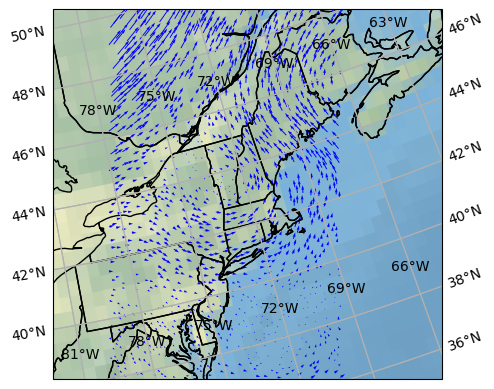

In [40]:
f = data.plot_vel_data(indices, color = "blue", frame= 0)

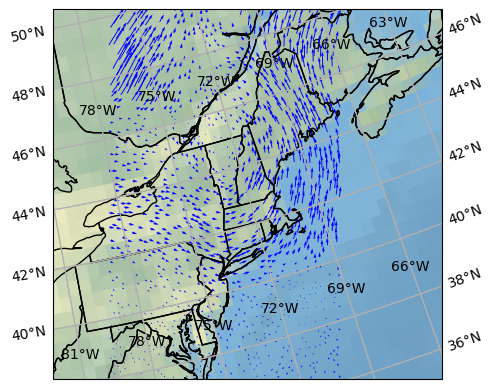

In [41]:
f = data.plot_vel(indices, color = "blue", frame = 0)